# Detection of Liver Diseases

## Context
    
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

## Overview

This data set contains 583 records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not.

### Following are the features:-
     1) Age :- Age of person
     2) Gender :- Person's gender
     3) Total_Bilirubin :- Total bilirubin content in the blood(mg/dL)
     4) Direct_Bilirubin :-Conjugated bilirubin content in blood which is soluble in water(mg/dL)
     5) Alkaline_Phosphotase :- Also known as ALP in IU/L
     6) Alamine_Aminotransferase :- Also known as ALT in IU/L
     7) Aspartate_Aminotransferase :- Also known as AST in IU/L
     8) Total_Protiens :- measure of two class of protein (albumin and globulin) measured in g/dL
     9) Albumin :- one of the class of protein present in blood measured in g/dL
    10) Albumin_and_Globulin_Ratio :- Ratio of two classes of proteins present in blood
    11) Class :- whether the given person is diagnosed with some liver diseases or not.

Before importing the data we should import all the required packages which will be useful while perfoming all the tasks like data pre-processing or data manipulation, EDA(Exploratory Data Analysis) and model etc.

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing the data for processing:-
warnings.filterwarnings("ignore") # to ignore warnings
data = pd.read_csv(r"Z:\Data Science data\Semester 2\IndianLiverPatientData.txt", 
                   header=None, sep="\t", index_col=0)
# The given data is in textual format and text is seperated by the "\t" but it didn't 
#                  had header(i.e. why header = None), keeping first column as index.

data.head() # to see First 5 Observations

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [3]:
# By the help of description of features we can give the column names to the imported data as there
# is no header or column name.
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Class']
data.head() # to see and check whether the above changes has been done or not.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [4]:
# After successfully importing the data first we have to check whether any missing value 
# are present in data or not. For that we do,
print(data.isnull().sum())

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64


In [5]:
# We can replace the missing values with the central tendency of the 
# variables(i.e. mean, median or mode).For that we will check the summary of the data.
print(data.describe(include='all'))

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   583.000000    563       583.000000        583.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    421              NaN               NaN   
mean     44.746141    NaN         3.298799          1.486106   
std      16.189833    NaN         6.209522          2.808498   
min       4.000000    NaN         0.400000          0.100000   
25%      33.000000    NaN         0.800000          0.200000   
50%      45.000000    NaN         1.000000          0.300000   
75%      58.000000    NaN         2.600000          1.300000   
max      90.000000    NaN        75.000000         19.700000   

        Alkaline_Phosphotase  Alamine_Aminotransferase  \
count             583.000000                583.000000   
unique                   NaN                       NaN   
top                      NaN                       NaN   

In [6]:
# As Gender is categorical variables we will replace it with Mode and 
# Total Proteins and  Albumin_and_Globulin_Ratio are numeric variables we will replace it with median
data2 = data.copy() # this is for only to not change the original data.    
data2['Gender'].fillna(data2['Gender'].mode()[0], inplace=True)
for value in ['Albumin_and_Globulin_Ratio', 'Total_Protiens']:
    data2[value].fillna(data2[value].median(), inplace=True)

# Checking whether the above changes been done to the dataset or not.
print(data2.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64


In [7]:
# Next step of data cleaning is to take care of outliers
print(data2.describe(np.arange(0.9, 0.99, 0.01), include='all')) # summary of the data

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   583.000000    583       583.000000        583.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    441              NaN               NaN   
mean     44.746141    NaN         3.298799          1.486106   
std      16.189833    NaN         6.209522          2.808498   
min       4.000000    NaN         0.400000          0.100000   
50%      45.000000    NaN         1.000000          0.300000   
90%      66.000000    NaN         7.860000          4.080000   
91%      66.000000    NaN         8.900000          4.500000   
92%      67.440000    NaN        10.900000          5.144000   
93%      69.260000    NaN        12.256000          6.252000   
94%      70.000000    NaN        14.816000          7.608000   
95%      72.000000    NaN        16.350000          8.400000   
96%      72.720000    NaN        18.2880

In [8]:
# As we can see there are some outliers which has to be treated or to be deleted therefore, we
# reduce the no. of observation by removing the outliers.

data3 = data2.loc[data2["Alkaline_Phosphotase"] < 909]
data4 = data3.loc[data3["Alamine_Aminotransferase"] < 500]

# To check whether the outliers are removed or not
print(data4.describe(np.arange(0.9, 0.99, 0.01), include='all'))

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   554.000000    554       554.000000        554.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    420              NaN               NaN   
mean     44.599278    NaN         3.044224          1.356498   
std      16.215381    NaN         6.034369          2.687107   
min       4.000000    NaN         0.400000          0.100000   
50%      45.000000    NaN         1.000000          0.300000   
90%      65.700000    NaN         6.800000          3.270000   
91%      66.000000    NaN         7.323000          4.000000   
92%      66.760000    NaN         8.456000          4.300000   
93%      69.290000    NaN        10.316000          5.058000   
94%      70.000000    NaN        12.592000          6.892000   
95%      72.000000    NaN        15.340000          7.940000   
96%      72.000000    NaN        17.2280

In [9]:
# Spliting the data in independent and dependent variables for checking multicollinearity in 
# dependent variables.

x = data4[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
           'Albumin_and_Globulin_Ratio']]
y = data4[['Class']]
corr1 = x.corr(method='pearson')
print(corr1)

                                 Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.020704          0.012033   
Total_Bilirubin             0.020704         1.000000          0.860373   
Direct_Bilirubin            0.012033         0.860373          1.000000   
Alkaline_Phosphotase        0.009075         0.184910          0.209227   
Alamine_Aminotransferase   -0.053116         0.223902          0.264239   
Aspartate_Aminotransferase -0.007257         0.294169          0.328998   
Total_Protiens             -0.185952         0.006380          0.012968   
Albumin                    -0.265396        -0.224084         -0.234582   
Albumin_and_Globulin_Ratio -0.207842        -0.200034         -0.194982   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.009075                 -0.053116   
Total_Bilirubin                         0.184910                  0.223902   
Direct_Bilirubi

Observing correlation between the data we can say that we are going to removing following columns:-

    1) Albumin: - Because albumin is correlated to two of the variables that is albumin_and_globulin_ratio and total_proteins as it was expected from the description of the features or        variables.
    2) Direct_Bilirubin:- As we can observe total_bilirubin and Direct_bilirubin are correlated   but total_bilirubin considers both direct_bilirubin and indirect_bilirubin, so keeping          total_bilirubin and droping direct_bilirubin.
    3) Aspartate_Aminotransferase:- Between Alamine_Aminotransferase(ALT) and  Aspartate_Aminotransferase(AST), the ALT is more specific to liver compare to AST. As we are predicting the liver diseases we will check for ALT rather then AST.

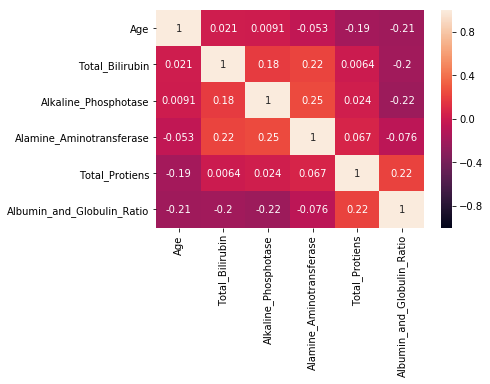

In [10]:
# removing the above correlated data  and checking again the data for correlation with help
# of heatmap
x = data4[['Age', 'Gender', 'Total_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
coor2 = x.corr(method="pearson")
sn.heatmap(coor2, vmin=-1, vmax=1, annot=True)

In [11]:
# Now concating the x ad y data to make the revise data with no multicolinearity and 
# controlled outliers
data5 = pd.concat([x, y], axis=1)# axis =1 which means we have to concatenate according to columns.


## Exploratory Data Analysis

It is nothing but the initial investigation on data to discover pattern or to spot anomalies(if any) with the help of graphical representation.

### Age wise Class Distribution.

Text(0.5,1,'Age wise Class distribution')

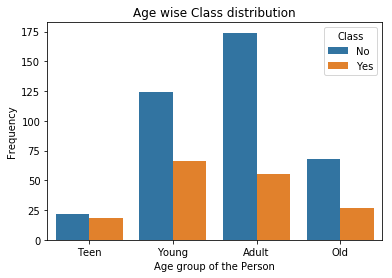

In [12]:
data6 = data5.copy()
data6['Age Group'] = pd.cut(data6['Age'],bins = [0,20,40,60,100],
                            labels=['Teen','Young','Adult','Old'])
sn.countplot('Age Group',hue = 'Class',data = data6)
plt.xlabel('Age group of the Person')
plt.ylabel('Frequency')
plt.title('Age wise Class distribution')

By above obseved graph we can say that the 33% of person below age 40 are more like to have liver diseases compared to the age group '40 to 60'. or simply we can say that if 3 person of age less than 40 come for testing then there is a probability of one having a liver disease.

### According to the Gender

Text(0.5,1,'According to Gender')

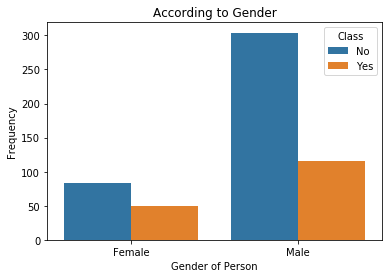

In [13]:
sn.countplot('Gender',hue = 'Class',data = data6)
plt.xlabel('Gender of Person')
plt.ylabel('Frequency')
plt.title('According to Gender')

As per above the graph, we can say that the Male are having liver disease are almost double compared to the Female.

#### Converting the categorical variable to numeric varibales for simplicity(Encoding).

The variable which are to converted are 

    1) Gender :-  0 for "Female" and 1 for "Male"
    2) Class :- 0 for "No" and 1 for "Yes".

In [14]:
col_name = ['Gender', 'Class'] # the column names which has to be converted
le = {} # creating an empty list for storing the label encoder
for value in col_name:
    le[value] = preprocessing.LabelEncoder()
for value in col_name:
    data5[value] = le[value].fit_transform(data5[value])
print(data5['Class'].value_counts())

0    388
1    166
Name: Class, dtype: int64


In [15]:
# As we can see that there is a class imbalancing in this problem for that we have to resample
df_major = data5[data5['Class'] == 0]
df_minor = data5[data5['Class'] == 1]

up_sample = resample(df_minor, replace=True, n_samples=388, random_state=0)

data6 = pd.concat([df_major, up_sample])
data6['Class'].value_counts()

1    388
0    388
Name: Class, dtype: int64

After resampling there is a class balancing done to improve to predictibility of the data.Again we are separating the dependent and independent variable for building the model.And also scaling the independent data variables for building model. 

In [16]:
x = data6[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
           'Alamine_Aminotransferase', 'Total_Protiens',
           'Albumin_and_Globulin_Ratio']] # independent variables
y = data6[['Class']] # Dependent variables

# Scaling the independent variables to give each and every independent variable equal weightage.
# Therefore, all variables are equally weighted.
scale = StandardScaler()
scale.fit(x)
x = scale.transform(x)
print(x)

[[ 1.29118127 -1.80012143 -0.34144154 ... -0.57566446  0.27026155
  -0.24263569]
 [ 1.11123215  0.55551808  1.62707626 ...  0.24050293  0.92681823
  -0.74997228]
 [ 1.11123215  0.55551808  0.93230527 ...  0.17248898  0.45784917
  -0.27434422]
 ...
 [-1.94790277  0.55551808 -0.34144154 ... -0.40562958  0.55164298
   1.34279117]
 [-1.88791973  0.55551808 -0.32214235 ... -0.04855635  0.17646774
   0.39153506]
 [ 0.81131696  0.55551808 -0.28354396 ... -0.52465399 -1.23043943
   0.70862043]]


#### Spliting the data into train and test.
We are spliting the data in 80-20 pattern that is 80% training and 20% testing as the data is very small, this spliting pattern will be good. Because if we give more amount of observation then the model will be trained well or there might be chance of underfitting of model.

In [17]:
# Spliting into 80-20 pattern.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("This are some x_train value:-")
print(x_train)
print("\n")
print("This are some x_test value:-")
print(x_test)
print("\n")
print("This are some y_train value:-")
print(y_train)
print("\n")
print("This are some y_test value:-")
print(y_test)

This are some x_train value:-
[[ 1.05124911  0.55551808 -0.32214235 ... -0.37162261  0.36405536
  -0.24263569]
 [ 0.15150355  0.55551808 -0.36074074 ... -0.60967143  0.36405536
  -0.24263569]
 [ 1.89101164  0.55551808  1.56917868 ... -0.21859122 -1.32423324
  -1.51097717]
 ...
 [ 0.09152051  0.55551808 -0.32214235 ... -0.43963656 -0.19870751
   0.07444968]
 [ 0.99126608  0.55551808 -0.05195363 ... -0.08256332 -0.38629513
  -0.24263569]
 [-0.0884286   0.55551808 -0.32214235 ... -0.3886261   0.17646774
  -0.55972106]]


This are some x_test value:-
[[ 1.47113038 -1.80012143 -0.34144154 ... -0.54165748 -0.1049137
   1.34279117]
 [-0.20839468  0.55551808 -0.36074074 ... -0.50765051 -1.04285181
  -0.55972106]
 [ 1.71106253  0.55551808 -0.34144154 ... -0.57566446  0.7392306
   0.07444968]
 ...
 [-0.50830987 -1.80012143 -0.28354396 ...  1.41374355  1.30199347
  -0.87680643]
 [-1.04815721 -1.80012143 -0.34144154 ... -0.23559471  1.5833749
   0.39153506]
 [-1.04815721  0.55551808  0.8358093  ..

## Model Building Algorithm

### Logistic Regression

In [18]:
# building model for logistic regression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
# Predicting the value of class in x_test with the help of model building.
y_pred_lr = model_lr.predict(x_test)

In [19]:
# Checking the accuracy , recall , precision with help of confusion matrix.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[41 30]
 [19 66]]
Accuracy: 0.6858974358974359
Precision: 0.6875
Recall: 0.7764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        71
           1       0.69      0.78      0.73        85

    accuracy                           0.69       156
   macro avg       0.69      0.68      0.68       156
weighted avg       0.69      0.69      0.68       156



In [20]:
# we know that bydefault cutoff is 0.5 let's check for the other cut-offs.
y_pred_prob = model_lr.predict_proba(x_test)
print("Probability of No and Yes:",y_pred_prob)
print("\n")

Probability of No and Yes: [[3.79015689e-01 6.20984311e-01]
 [3.15061664e-01 6.84938336e-01]
 [5.03658284e-01 4.96341716e-01]
 [8.76892943e-01 1.23107057e-01]
 [3.85386419e-01 6.14613581e-01]
 [3.42904387e-01 6.57095613e-01]
 [3.10812823e-01 6.89187177e-01]
 [3.84841870e-01 6.15158130e-01]
 [2.73809565e-01 7.26190435e-01]
 [3.88145628e-01 6.11854372e-01]
 [3.59816573e-01 6.40183427e-01]
 [3.36302097e-01 6.63697903e-01]
 [7.16060973e-01 2.83939027e-01]
 [3.10763336e-01 6.89236664e-01]
 [3.07018224e-01 6.92981776e-01]
 [3.88145628e-01 6.11854372e-01]
 [3.94509746e-01 6.05490254e-01]
 [5.69212388e-01 4.30787612e-01]
 [5.98679316e-01 4.01320684e-01]
 [5.93751541e-01 4.06248459e-01]
 [4.03036778e-01 5.96963222e-01]
 [2.20803501e-01 7.79196499e-01]
 [2.56669791e-01 7.43330209e-01]
 [2.73809565e-01 7.26190435e-01]
 [9.92174127e-01 7.82587320e-03]
 [3.90471903e-01 6.09528097e-01]
 [6.05807637e-01 3.94192363e-01]
 [2.43451824e-01 7.56548176e-01]
 [4.95418788e-01 5.04581212e-01]
 [5.69212388e-01

In [21]:
# For thersold we can check for range of cut-offs which is as follows:-
for a in np.arange(0.2,0.5,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.2 : 46  , type 2 error : 1  , type 1 error: 45
Errors at threshold  0.21000000000000002 : 46  , type 2 error : 1  , type 1 error: 45
Errors at threshold  0.22000000000000003 : 45  , type 2 error : 1  , type 1 error: 44
Errors at threshold  0.23000000000000004 : 45  , type 2 error : 1  , type 1 error: 44
Errors at threshold  0.24000000000000005 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.25000000000000006 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.26000000000000006 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2700000000000001 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2800000000000001 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2900000000000001 : 43  , type 2 error : 2  , type 1 error: 41
Errors at threshold  0.3000000000000001 : 44  , type 2 error : 3  , type 1 error: 41
Errors at threshold  0.3100000000000001 : 44  , type 2 error : 3  , type 1

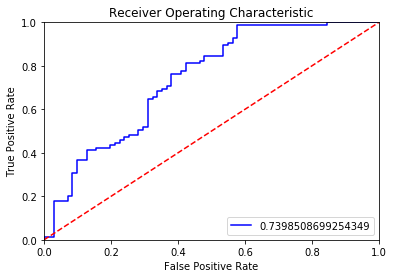

Area under Curve: 0.7398508699254349


In [22]:
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("Area under Curve:",auc)

In [23]:
# We know that in this case the type 2 error(i.e having diseases but not predicated), 
# therefore the thersold value can be taken as 0.29 where overall error is less as well as 
# less chances of overfitting.
y_pred_lr = np.where(y_pred_prob[:,1]>0.29,1,0)
# Now again checking the accuracy of the model.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[30 41]
 [ 2 83]]
Accuracy: 0.7243589743589743
Precision: 0.6693548387096774
Recall: 0.9764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.42      0.58        71
           1       0.67      0.98      0.79        85

    accuracy                           0.72       156
   macro avg       0.80      0.70      0.69       156
weighted avg       0.79      0.72      0.70       156



    Accuracy of Model:- 0.7243 or 72.43%
We can observed that as recall is closer to 1 which means we have a higher chances of predicting 1's or having diseases.

### Support Vector Machine

In [24]:
# Building Model and predicting the values.
model = SVC(C=1)  # i.e cost = 1
model.fit(x_train, y_train)
y_pred_svc = model.predict(x_test)

In [25]:
# Checking the accuracy , recall , precision with help of confusion matrix.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Accuracy:",accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Confusion Matrix:
[[36 35]
 [10 75]]
Accuracy: 0.7115384615384616
Precision: 0.6818181818181818
Recall: 0.8823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.51      0.62        71
           1       0.68      0.88      0.77        85

    accuracy                           0.71       156
   macro avg       0.73      0.69      0.69       156
weighted avg       0.73      0.71      0.70       156



### Random Forest

In [26]:
# Building the model and predicting the values.
model_rf = RandomForestClassifier(n_estimators=10000,criterion="entropy",min_samples_split=3,
                                  random_state=0)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [27]:
# Checking the accuracy , recall , precision with help of confusion matrix.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[50 21]
 [ 4 81]]
Accuracy: 0.8397435897435898
Precision: 0.7941176470588235
Recall: 0.9529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        71
           1       0.79      0.95      0.87        85

    accuracy                           0.84       156
   macro avg       0.86      0.83      0.83       156
weighted avg       0.85      0.84      0.84       156



### XGBoost

In [28]:
# Building the model and predicting the values
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10000,gamma=0.29)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [29]:
# Checking the accuracy , recall , precision with help of confusion matrix.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:",accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[53 18]
 [ 6 79]]
Accuracy: 0.8461538461538461
Precision: 0.8144329896907216
Recall: 0.9294117647058824
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        71
           1       0.81      0.93      0.87        85

    accuracy                           0.85       156
   macro avg       0.86      0.84      0.84       156
weighted avg       0.85      0.85      0.84       156



In [30]:
# Creating the list of algorithm and its accuracy.
table = {"Model":["Logistic Regression","Support Vector Machine","Random Forest","XGBoost"],
         "Accuracy":[accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_svc),
                     accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_xgb)]}
table = pd.DataFrame(table)
print(table)

                    Model  Accuracy
0     Logistic Regression  0.724359
1  Support Vector Machine  0.711538
2           Random Forest  0.839744
3                 XGBoost  0.846154


## Conclusion

After performing various classification techniques and taking into account their accuracies, we can conclude all the models had an accuracy ranging from 71% to 85%. Out of which XGBoost Algorithm gave a slightly better accuracy of 84.61%.